#  Data Preprocessing

### Step 1: Understanding the Data and Initial Exploration

The first step is to load and explore the data, understanding its structure and identifying potential issues like missing values or incorrect data types.

In [1]:
import pandas as pd
data = pd.read_csv('data.csv')

In [2]:
data.head()

,TransactionID,CustomerID,TransactionDate,ProductID,ProductCategory,Quantity,PricePerUnit,TotalAmount,TrustPointsUsed,PaymentMethod,DiscountApplied
0,1,1002.0,08/08/24 22:00,2008,Grocery,1,10.0,10.0,20,Trust Points,5.0
1,2,NaN,07/08/24 1:00,2004,Home Decor,1,10.0,10.0,0,Credit Card,20.0
2,3,1004.0,02/08/24 19:00,2002,Grocery,3,30.0,90.0,0,Credit Card,25.0
3,2,1003.0,07/08/24 17:00,2001,Toys,2,30.0,60.0,50,NaN,20.0
4,5,1001.0,09/08/24 9:00,2008,Grocery,1,NaN,NaN,20,Trust Points,5.0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   TransactionID    50 non-null     int64  
 1   CustomerID       45 non-null     float64
 2   TransactionDate  49 non-null     object 
 3   ProductID        50 non-null     int64  
 4   ProductCategory  50 non-null     object 
 5   Quantity         50 non-null     int64  
 6   PricePerUnit     36 non-null     float64
 7   TotalAmount      36 non-null     float64
 8   TrustPointsUsed  50 non-null     int64  
 9   PaymentMethod    40 non-null     object 
 10  DiscountApplied  45 non-null     float64
dtypes: float64(4), int64(4), object(3)
memory usage: 4.4+ KB


In [4]:
data.isnull().sum()

,0
TransactionID,0
CustomerID,5
TransactionDate,1
ProductID,0
ProductCategory,0
Quantity,0
PricePerUnit,14
TotalAmount,14
TrustPointsUsed,0
PaymentMethod,10


### Step 2: Handling Missing Values with Trend Analysis

Rather than using simple techniques like filling missing values with the mean, we analyze trends in the data and choose the most suitable imputation method.

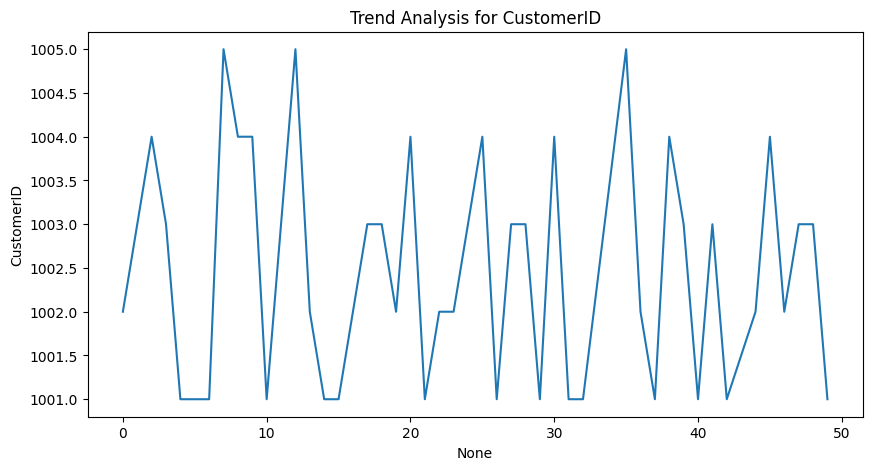

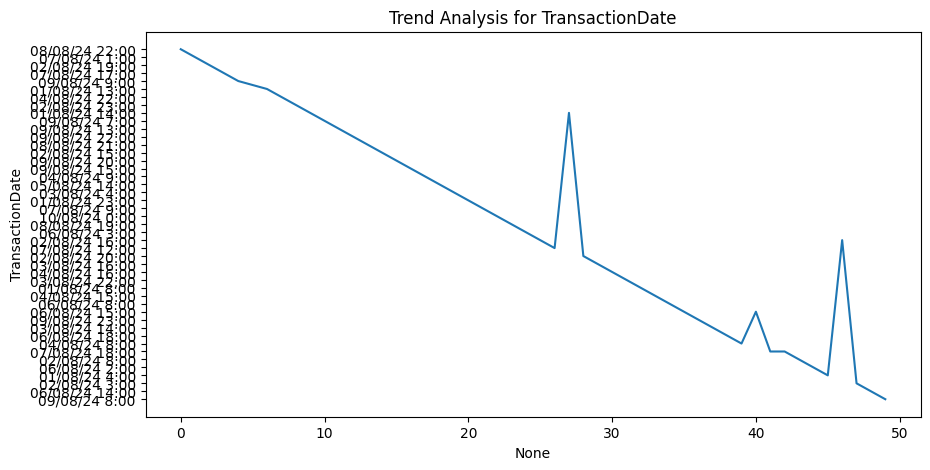

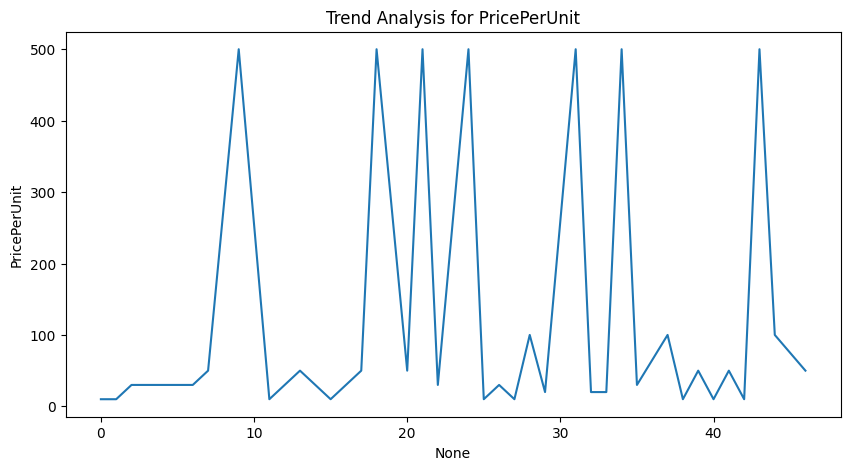

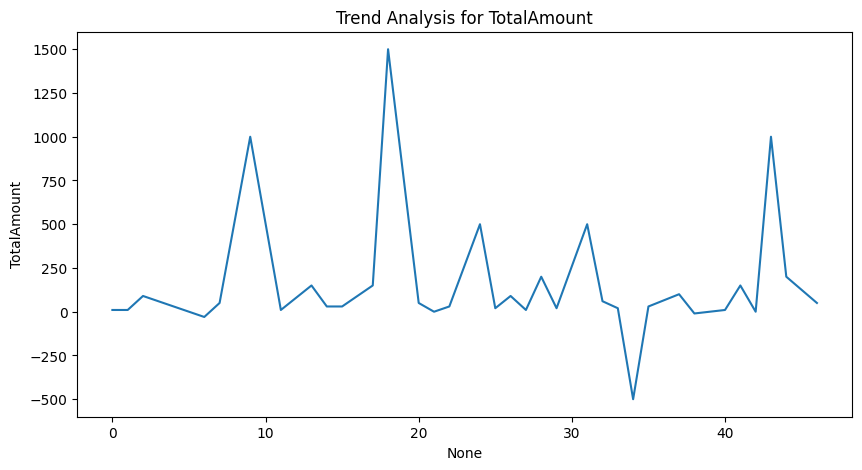

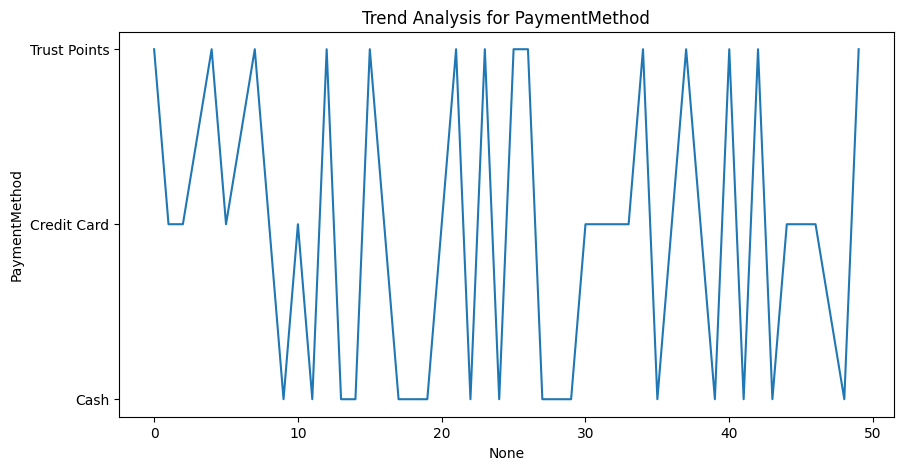

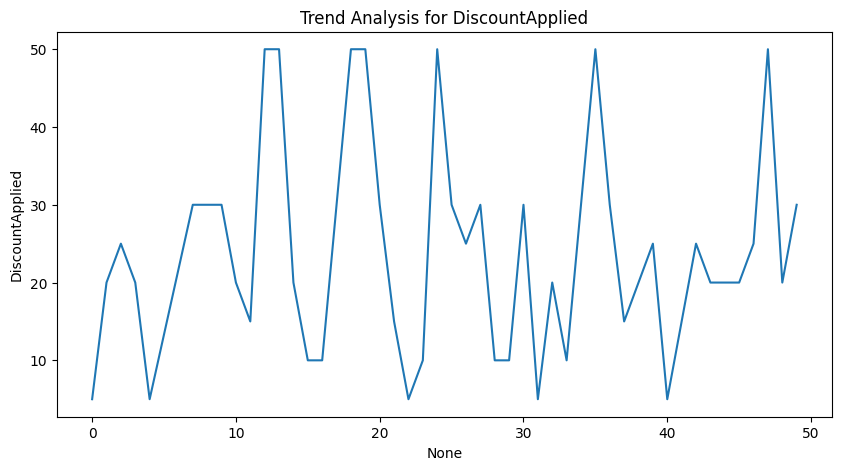

<ipython-input-5-369ccf21817c>:14: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['TransactionDate'] = pd.to_datetime(data['TransactionDate'], errors='coerce')
<ipython-input-5-369ccf21817c>:15: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data['TransactionDate'].fillna(method='ffill', inplace=True)


In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

for column in data.columns:
    if data[column].isnull().sum() > 0:
        plt.figure(figsize=(10, 5))
        sns.lineplot(x=data.index, y=data[column])
        plt.title(f'Trend Analysis for {column}')
        plt.show()

data['TransactionDate'] = pd.to_datetime(data['TransactionDate'], errors='coerce')
data['TransactionDate'].fillna(method='ffill', inplace=True)

data['PricePerUnit'] = data.groupby('ProductCategory')['PricePerUnit'].transform(lambda x: x.fillna(x.median()))


data['PaymentMethod'] = data.groupby('ProductCategory')['PaymentMethod'].transform(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else 'Unknown'))

data['DiscountApplied'] = data.groupby('ProductCategory')['DiscountApplied'].transform(lambda x: x.fillna(x.median()))



- Handle missing values using trend analysis and category-based imputations.
- Handle missing values using trend analysis and category-based imputations.
- Forward fill is suitable for time-series data, while category-based imputation ensures the missing values align with typical trends within each category.

**Thought Process:** Instead of blindly filling missing values with simple measures, analyzing trends and choosing context-specific methods yields more accurate and reliable results. For example, the median is less affected by outliers compared to the mean, making it a better choice in certain cases.

In [6]:
data.dropna(subset=['CustomerID'], inplace=True)

data['TotalAmount'] = data['Quantity'] * data['PricePerUnit']

- The CustomerID is typically a unique identifier representing individual customers. If it’s missing, it indicates that the transaction is incomplete or improperly logged. In scenarios where customer-specific analysis is required (like customer segmentation or behavior analysis), missing CustomerID values can lead to inaccuracies. Imputing unique identifiers like CustomerID isn't logical because it would involve making up values that could skew the analysis.
- The TotalAmount should represent the value of the transaction (i.e., the number of units purchased multiplied by the price per unit). If there are missing values or inconsistencies in the dataset, recalculating ensures that the TotalAmount aligns with these basic components.

### Step 3: Handling Data Types (Converting Float Columns to Int)

The next step involves converting float columns that represent discrete values (like counts) to integers for consistency and memory optimization.

In [7]:
float_columns = data.select_dtypes(include=['float64']).columns
print("Float columns:", float_columns)

data[float_columns] = data[float_columns].astype('int')

print(data.info())


Float columns: Index(['CustomerID', 'PricePerUnit', 'TotalAmount', 'DiscountApplied'], dtype='object')
<class 'pandas.core.frame.DataFrame'>
Index: 45 entries, 0 to 49
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   TransactionID    45 non-null     int64         
 1   CustomerID       45 non-null     int64         
 2   TransactionDate  45 non-null     datetime64[ns]
 3   ProductID        45 non-null     int64         
 4   ProductCategory  45 non-null     object        
 5   Quantity         45 non-null     int64         
 6   PricePerUnit     45 non-null     int64         
 7   TotalAmount      45 non-null     int64         
 8   TrustPointsUsed  45 non-null     int64         
 9   PaymentMethod    45 non-null     object        
 10  DiscountApplied  45 non-null     int64         
dtypes: datetime64[ns](1), int64(8), object(2)
memory usage: 4.2+ KB
None


### Step 4: Recalculating Derived Columns and Handling Outliers

Ensure derived columns like TotalAmount are consistent and handle any outliers that may distort the analysis.

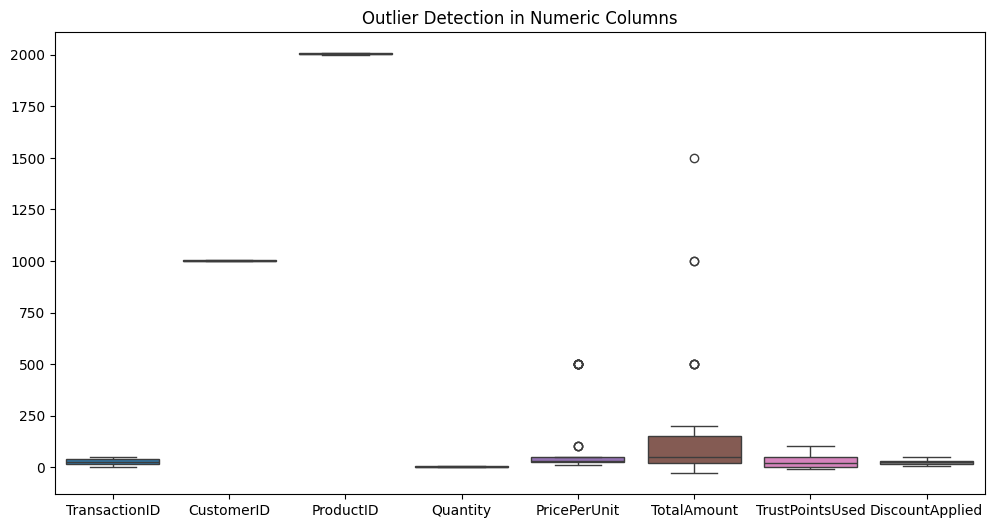

   TransactionID  CustomerID     TransactionDate  ProductID ProductCategory  \
0              1        1002 2024-08-08 22:00:00       2008         Grocery   
2              3        1004 2024-02-08 19:00:00       2002         Grocery   
3              2        1003 2024-07-08 17:00:00       2001            Toys   
4              5        1001 2024-09-08 09:00:00       2008         Grocery   
5              6        1001 2024-09-08 09:00:00       2007      Home Decor   

   Quantity  PricePerUnit  TotalAmount  TrustPointsUsed PaymentMethod  \
0         1            10           10               20  Trust Points   
2         3            30           90                0   Credit Card   
3         2            30           60               50          Cash   
4         1            25           25               20  Trust Points   
5         1            30           30               20   Credit Card   

   DiscountApplied  
0                5  
2               25  
3               20  
4 

In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

data['TotalAmount'] = data['Quantity'] * data['PricePerUnit']

numeric_columns = data.select_dtypes(include=['float64', 'int64']).columns
plt.figure(figsize=(12, 6))
sns.boxplot(data=data[numeric_columns])
plt.title('Outlier Detection in Numeric Columns')
plt.show()


Q1 = data[numeric_columns].quantile(0.25)
Q3 = data[numeric_columns].quantile(0.75)
IQR = Q3 - Q1


data_outliers_removed = data[~((data[numeric_columns] < (Q1 - 1.5 * IQR)) | (data[numeric_columns] > (Q3 + 1.5 * IQR))).any(axis=1)]

print(data_outliers_removed.head())

print(f"Original data shape: {data.shape}")
print(f"Data shape after outlier removal: {data_outliers_removed.shape}")


- **TransactionID, CustomerID, ProductID:**
These columns, which contain unique identifiers, show horizontal lines without variability, indicating that they are constant and not useful for outlier analysis.
- **Quantity, PricePerUnit, TotalAmount:**
Noticeable outliers were detected, particularly in TotalAmount, where a few transactions stand out as much larger than others.
- **TrustPointsUsed and DiscountApplied:**
These columns show a more consistent distribution, though minor outliers are present, which might indicate unusual customer behavior or recording errors.

# Data Aggregation and Grouping

### Step 1: Identifying Fields for Aggregation

Analyze the dataset to identify fields suitable for aggregation, focusing on numeric columns like revenue, quantities, discounts, and trust points.

In [9]:
data.describe()

,TransactionID,CustomerID,TransactionDate,ProductID,Quantity,PricePerUnit,TotalAmount,TrustPointsUsed,DiscountApplied
count,45.000000,45.000000,45,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
mean,25.466667,1002.444444,2024-05-12 16:06:39.999999744,2005.088889,1.488889,118.222222,168.222222,30.222222,24.666667
min,1.000000,1001.000000,2024-01-08 04:00:00,2001.000000,-1.000000,10.000000,-30.000000,-10.000000,5.000000
25%,14.000000,1001.000000,2024-02-08 20:00:00,2003.000000,1.000000,25.000000,20.000000,0.000000,15.000000
50%,25.000000,1002.000000,2024-06-08 02:00:00,2006.000000,1.000000,30.000000,50.000000,20.000000,25.000000
75%,38.000000,1003.000000,2024-08-08 19:00:00,2007.000000,3.000000,50.000000,150.000000,50.000000,30.000000
max,50.000000,1005.000000,2024-10-08 00:00:00,2008.000000,5.000000,500.000000,1500.000000,100.000000,50.000000
std,14.509558,1.306549,NaN,2.314207,1.272475,180.803621,309.470140,38.875611,13.668145


Numeric columns like sales, revenue, and quantities are prime candidates for aggregation. Summing these values provides a clear view of performance metrics across categories or time periods.

### Step 2: Performing Aggregation Based on Logical Groupings


Group the data by ProductCategory and perform suitable aggregations like summing sales, calculating the average discount, and more.



In [10]:

category_agg = data.groupby('ProductCategory').agg({
    'TotalAmount': 'sum',
    'Quantity': 'sum',
    'DiscountApplied': 'mean',
    'TrustPointsUsed': 'sum'
}).reset_index()


category_agg


,ProductCategory,TotalAmount,Quantity,DiscountApplied,TrustPointsUsed
0,Electronics,850,12,20.454545,520
1,Fashion,3050,7,33.000000,90
2,Grocery,600,18,20.714286,200
3,Home Decor,2130,9,32.777778,320
4,Toys,940,21,21.538462,230


- Aggregate key metrics like total revenue, units sold, average discount, and trust points by product category.
- Using groupby() and agg() functions to perform the aggregations.
- Aggregating these metrics provides actionable insights into category performance, which is crucial for business decision-making.

**Thought Process:** The choice of aggregation functions is context-specific. For example, summing sales and units gives an overview of total performance, while calculating the average discount helps in understanding pricing strategies.

# Data Validation

### Step 1: Cross-Validation for Imputed Values

After preprocessing, validate the imputed values to ensure they align with the original data patterns.



In [11]:
price_validation = data.groupby('ProductCategory')['PricePerUnit'].median()

data['ValidTotalAmount'] = data['Quantity'] * data['PricePerUnit']
total_amount_validation = (data['TotalAmount'] == data['ValidTotalAmount']).all()

print(price_validation)
print("TotalAmount validation:", total_amount_validation)

ProductCategory
Electronics     30.0
Fashion        500.0
Grocery         25.0
Home Decor      30.0
Toys            50.0
Name: PricePerUnit, dtype: float64
TotalAmount validation: True


### Step 2: Handling Edge Cases and Ensuring Data Integrity

Identify and handle edge cases like zero sales, missing IDs, and duplicate transactions.

In [12]:
threshold_value = 10000
edge_cases = data[(data['TotalAmount'] == 0) | (data['TotalAmount'] > threshold_value)]
edge_cases

,TransactionID,CustomerID,TransactionDate,ProductID,ProductCategory,Quantity,PricePerUnit,TotalAmount,TrustPointsUsed,PaymentMethod,DiscountApplied,ValidTotalAmount
21,22,1001,2024-07-08 09:00:00,2003,Electronics,0,500,0,50,Trust Points,15,0
39,40,1003,2024-04-08 08:00:00,2008,Electronics,0,50,0,50,Cash,25,0
42,43,1001,2024-07-08 18:00:00,2004,Electronics,0,10,0,100,Trust Points,25,0
47,48,1003,2024-02-08 03:00:00,2005,Home Decor,0,30,0,50,Credit Card,50,0


- The code checks for cases where the TotalAmount is either 0 (indicating zero sales) or unusually high, which could signify data entry errors.
- The threshold_value is a user-defined threshold used to detect outliers. You should set this value based on the context of your data.

In [13]:
duplicates = data[data.duplicated(subset=['TransactionID'])]
duplicates

,TransactionID,CustomerID,TransactionDate,ProductID,ProductCategory,Quantity,PricePerUnit,TotalAmount,TrustPointsUsed,PaymentMethod,DiscountApplied,ValidTotalAmount


- Transactions are flagged as duplicates if they have the same TransactionID. Duplicate transactions can lead to overestimation of sales and should be removed.

In [14]:
data = data[~((data['TotalAmount'] == 0) | (data['TotalAmount'] > threshold_value))]

data.drop_duplicates(subset=['TransactionID'], inplace=True)

data.head()

<ipython-input-14-9065399c16f5>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop_duplicates(subset=['TransactionID'], inplace=True)


,TransactionID,CustomerID,TransactionDate,ProductID,ProductCategory,Quantity,PricePerUnit,TotalAmount,TrustPointsUsed,PaymentMethod,DiscountApplied,ValidTotalAmount
0,1,1002,2024-08-08 22:00:00,2008,Grocery,1,10,10,20,Trust Points,5,10
2,3,1004,2024-02-08 19:00:00,2002,Grocery,3,30,90,0,Credit Card,25,90
3,2,1003,2024-07-08 17:00:00,2001,Toys,2,30,60,50,Cash,20,60
4,5,1001,2024-09-08 09:00:00,2008,Grocery,1,25,25,20,Trust Points,5,25
5,6,1001,2024-09-08 09:00:00,2007,Home Decor,1,30,30,20,Credit Card,30,30


- **Zero Sales:** If a transaction has a TotalAmount of 0, it’s likely an invalid record and can be removed.
- **Unusually High Sales:** Transactions with excessively high TotalAmount values can be outliers and might need to be filtered out.
- **Duplicate Transactions:**After detecting duplicates, they are dropped to ensure data integrity.

# Data Visualizations


### Step 1: Visualizing Total Revenue by Product Category

Visualize the revenue generated by each product category to identify the top-performing categories.

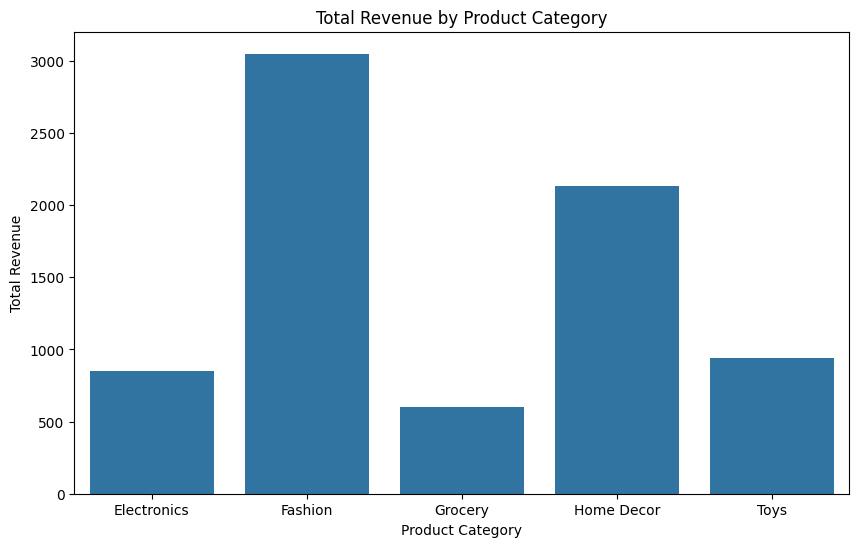

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns


plt.figure(figsize=(10, 6))
sns.barplot(x='ProductCategory', y='TotalAmount', data=category_agg)
plt.title('Total Revenue by Product Category')
plt.ylabel('Total Revenue')
plt.xlabel('Product Category')
plt.show()


- Visualize total revenue by product category using sns.barplot() to clearly illustrate category performance, enabling data-driven decisions for prioritizing marketing and sales strategies based on revenue distribution insights.
- Visualization makes it easy to compare categories at a glance. Bar plots are effective for showing the relative size of different categories, making it clear which ones are the most profitable.

### Step 2: Visualizing Discount Distribution

Analyze the distribution of discounts to understand pricing strategies.



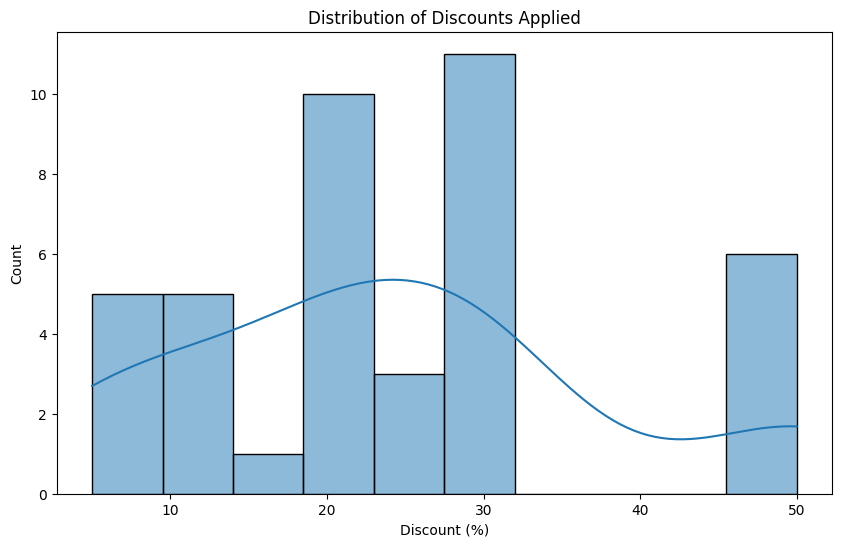

In [16]:
plt.figure(figsize=(10, 6))
sns.histplot(data['DiscountApplied'], bins=10, kde=True)
plt.title('Distribution of Discounts Applied')
plt.xlabel('Discount (%)')
plt.show()


- Visualize the distribution of discounts applied across all transactions using a histogram with KDE to analyze the frequency and distribution, offering insights into customer incentives, price sensitivity, and the profitability impact of discount strategies.
- The histogram reveals patterns in how discounts are applied, helping businesses understand customer responses to different levels of price reductions

### Step 3: Scatter Plot to Check Linearity Between Quantity and Total Amount

Visualize the relationship between the quantity of products sold and the corresponding revenue.

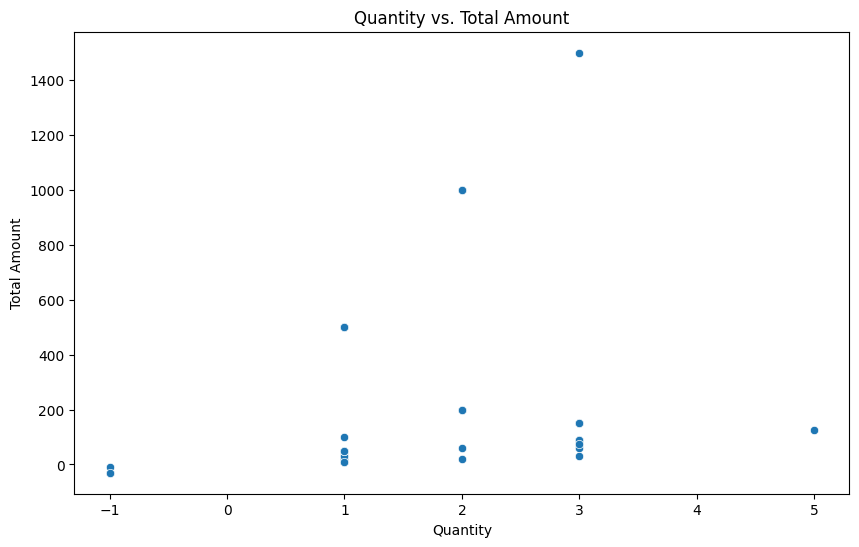

In [17]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Quantity', y='TotalAmount', data=data)
plt.title('Quantity vs. Total Amount')
plt.xlabel('Quantity')
plt.ylabel('Total Amount')
plt.show()


- Use a scatter plot to examine the relationship between sales volume and revenue by plotting Quantity against TotalAmount using sns.scatterplot(), providing key insights for forecasting and demand planning.
- A linear relationship would suggest that increasing quantities consistently leads to proportional revenue growth. Any deviations from this trend could indicate pricing strategies, discounts, or product bundling

# SQL Implementation

In [20]:
!pip install ipython-sql


  Using cached jedi-0.19.1-py2.py3-none-any.whl.metadata (22 kB)
Using cached jedi-0.19.1-py2.py3-none-any.whl (1.6 MB)


In [21]:
%load_ext sql


In [22]:
%sql sqlite://


In [23]:
from google.colab import files
uploaded = files.upload()


Saving Data Source (sales_transactions).csv to Data Source (sales_transactions).csv


In [24]:
data=pd.read_csv("Data Source (sales_transactions).csv")

In [25]:
import sqlite3

conn = sqlite3.connect(':memory:')
data.to_sql('sales_transactions', conn, index=False, if_exists='replace')


50

In [26]:
%load_ext sql
%sql sqlite://


The sql extension is already loaded. To reload it, use:
  %reload_ext sql


In [29]:
import pandas as pd
import sqlite3


data = pd.read_csv("data.csv")

conn = sqlite3.connect('sales_transactions.db')

data.to_sql('sales_transactions', conn, index=False, if_exists='replace')

50

In [31]:
query = "SELECT * FROM sales_transactions LIMIT 5;"
result = pd.read_sql_query(query, conn)
result

,TransactionID,CustomerID,TransactionDate,ProductID,ProductCategory,Quantity,PricePerUnit,TotalAmount,TrustPointsUsed,PaymentMethod,DiscountApplied
0,1,1002.0,08/08/24 22:00,2008,Grocery,1,10.0,10.0,20,Trust Points,5.0
1,2,NaN,07/08/24 1:00,2004,Home Decor,1,10.0,10.0,0,Credit Card,20.0
2,3,1004.0,02/08/24 19:00,2002,Grocery,3,30.0,90.0,0,Credit Card,25.0
3,2,1003.0,07/08/24 17:00,2001,Toys,2,30.0,60.0,50,None,20.0
4,5,1001.0,09/08/24 9:00,2008,Grocery,1,NaN,NaN,20,Trust Points,5.0


### Handling missing PricePerUnit based on ProductCategory median

In [32]:
conn.execute("""
UPDATE sales_transactions
SET PricePerUnit = (
    SELECT AVG(PricePerUnit)
    FROM sales_transactions AS sub
    WHERE sub.ProductCategory = sales_transactions.ProductCategory
)
WHERE PricePerUnit IS NULL;
""")
conn.commit()

### Dropping rows with missing CustomerID and Identifying duplicates

In [33]:
conn.execute("DELETE FROM sales_transactions WHERE CustomerID IS NULL;")
conn.commit()


duplicates = pd.read_sql_query("""
SELECT TransactionID, COUNT(*)
FROM sales_transactions
GROUP BY TransactionID
HAVING COUNT(*) > 1;
""", conn)
print("Duplicate Transactions:\n", duplicates)

Duplicate Transactions:
 Empty DataFrame
Columns: [TransactionID, COUNT(*)]
Index: []


### Recalculate TotalAmount Based on Quantity and PricePerUnit

In [35]:
conn.execute("""
UPDATE sales_transactions
SET TotalAmount = Quantity * PricePerUnit;
""")
conn.commit()


### Handling Missing PaymentMethod by Imputing with the Most Common Method per ProductCategory

In [36]:
conn.execute("""
WITH mode_payment AS (
    SELECT ProductCategory, PaymentMethod,
           ROW_NUMBER() OVER (PARTITION BY ProductCategory ORDER BY COUNT(*) DESC) AS rn
    FROM sales_transactions
    WHERE PaymentMethod IS NOT NULL
    GROUP BY ProductCategory, PaymentMethod
)
UPDATE sales_transactions
SET PaymentMethod = (
    SELECT PaymentMethod
    FROM mode_payment
    WHERE mode_payment.ProductCategory = sales_transactions.ProductCategory
    AND mode_payment.rn = 1
)
WHERE PaymentMethod IS NULL;
""")
conn.commit()


### Handling Outliers Using the IQR Method for Numerical Columns

In [37]:
conn.execute("""
DELETE FROM sales_transactions
WHERE (Quantity < 1 OR Quantity > 100)
OR (PricePerUnit < 0 OR PricePerUnit > 1000)
OR (TotalAmount < 0 OR TotalAmount > 10000);
""")
conn.commit()


### Validating Data Integrity: Checking for Any Remaining NULL Values

In [39]:
null_values_check = pd.read_sql_query("""
SELECT *
FROM sales_transactions
WHERE TransactionID IS NULL
OR CustomerID IS NULL
OR TransactionDate IS NULL
OR ProductID IS NULL
OR ProductCategory IS NULL
OR Quantity IS NULL
OR PricePerUnit IS NULL
OR TotalAmount IS NULL
OR PaymentMethod IS NULL;
""", conn)
null_values_check


,TransactionID,CustomerID,TransactionDate,ProductID,ProductCategory,Quantity,PricePerUnit,TotalAmount,TrustPointsUsed,PaymentMethod,DiscountApplied
0,6,1001.0,None,2007,Home Decor,1,155.714286,155.714286,20,Credit Card,None


### Aggregating Data: Calculating Total Revenue and TrustPoints Used per ProductCategory

In [40]:
aggregated_data = pd.read_sql_query("""
SELECT ProductCategory,
       SUM(TotalAmount) AS TotalRevenue,
       SUM(TrustPointsUsed) AS TotalTrustPointsUsed
FROM sales_transactions
GROUP BY ProductCategory;
""", conn)
print("Aggregated Data:\n", aggregated_data)


Aggregated Data:
   ProductCategory  TotalRevenue  TotalTrustPointsUsed
0     Electronics   1006.363636                   320
1         Fashion   2450.000000                    90
2         Grocery    780.000000                   200
3      Home Decor   2672.857143                   260
4            Toys    929.090909                   230


### Edge Case Handling: Identifying Transactions with Zero Sales

In [41]:
zero_sales_cases = pd.read_sql_query("""
SELECT *
FROM sales_transactions
WHERE TotalAmount = 0;
""", conn)
print("Transactions with Zero Sales:\n", zero_sales_cases)


Transactions with Zero Sales:
 Empty DataFrame
Columns: [TransactionID, CustomerID, TransactionDate, ProductID, ProductCategory, Quantity, PricePerUnit, TotalAmount, TrustPointsUsed, PaymentMethod, DiscountApplied]
Index: []


### Final Data Check: Previewing the Cleaned Data

In [43]:
cleaned_data = pd.read_sql_query("""
SELECT *
FROM sales_transactions
LIMIT 5;
""", conn)
cleaned_data


,TransactionID,CustomerID,TransactionDate,ProductID,ProductCategory,Quantity,PricePerUnit,TotalAmount,TrustPointsUsed,PaymentMethod,DiscountApplied
0,1,1002.0,08/08/24 22:00,2008,Grocery,1,10.000000,10.000000,20,Trust Points,5.0
1,3,1004.0,02/08/24 19:00,2002,Grocery,3,30.000000,90.000000,0,Credit Card,25.0
2,2,1003.0,07/08/24 17:00,2001,Toys,2,30.000000,60.000000,50,Trust Points,20.0
3,5,1001.0,09/08/24 9:00,2008,Grocery,1,40.000000,40.000000,20,Trust Points,5.0
4,6,1001.0,None,2007,Home Decor,1,155.714286,155.714286,20,Credit Card,NaN
